In [120]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt



In [2]:
k=pd.read_csv("dataset-HAR-PUC-Rio.csv",delimiter=";")

C:\Users\mairi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [83]:
k


,user,gender,age,how_tall_in_meters,weight,body_mass_index,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,y4,z4,class
0,debora,Woman,46,"1,62",75,"28,6",-3,92,-63,-23,18,-19,5,104,-92,-150,-103,-147,sitting
1,debora,Woman,46,"1,62",75,"28,6",-3,94,-64,-21,18,-18,-14,104,-90,-149,-104,-145,sitting
2,debora,Woman,46,"1,62",75,"28,6",-1,97,-61,-12,20,-15,-13,104,-90,-151,-104,-144,sitting
3,debora,Woman,46,"1,62",75,"28,6",-2,96,-57,-15,21,-16,-13,104,-89,-153,-103,-142,sitting
4,debora,Woman,46,"1,62",75,"28,6",-1,96,-61,-13,20,-15,-13,104,-89,-153,-104,-143,sitting
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165628,jose_carlos,Man,75,"1,67",67,"24,0",2,93,-148,-8,88,-100,15,120,-100,-189,-77,-160,walking
165629,jose_carlos,Man,75,"1,67",67,"24,0",-1,94,-147,-17,87,-99,17,121,-99,-190,-78,-158,walking
165630,jose_carlos,Man,75,"1,67",67,"24,0",-10,93,-143,-19,86,-104,0,114,-101,-185,-80,-153,walking
165631,jose_carlos,Man,75,"1,67",67,"24,0",-15,86,-152,-19,88,-117,-44,155,-25,-185,-84,-156,walking


In [82]:
df=pd.DataFrame(k,columns=['class'])
df1=pd.DataFrame(k,columns=['gender'])

In [5]:
df

,class
0,sitting
1,sitting
2,sitting
3,sitting
4,sitting
...,...
165628,walking
165629,walking
165630,walking
165631,walking


In [81]:
categorical_movement = {
    'sitting' : 2,
    'sittingdown' : 3,
    'standing' : 4,
    'standingup' : 5,
    'walking' : 6   
}

categorical_gender = {
    'Woman' : 0,
    'Man' : 1
   }
num_cat_mov= df['class'].map(categorical_movement)
num_cat_gen=df1['gender'].map(categorical_gender)
new_df = k.copy()
new_df['num_cat_mov'] = num_cat_mov
new_df['num_cat_gen']=num_cat_gen
new_df['z4'] = pd.to_numeric(new_df['z4'], errors='coerce').fillna(0)
new_df['how_tall_in_meters'] = new_df['how_tall_in_meters'].str.replace(',', '.')
new_df['body_mass_index'] = new_df['body_mass_index'].str.replace(',', '.')


In [74]:
def center(dataframe):
    for column in dataframe.columns[6:18]:
        mean_value = dataframe[column].mean()
        dataframe[column] = dataframe[column] - mean_value
    return dataframe
    

In [382]:
def normalize(dataframe):
    scaler = MinMaxScaler()
    for column in dataframe.columns[6:18]:
        dataframe[column] = scaler.fit_transform(dataframe[[column]])
    return dataframe
    

In [41]:
def standardize(dataframe):
    scaler = StandardScaler()
    for column in dataframe.columns[6:18]:
        dataframe[column] = scaler.fit_transform(dataframe[[column]])
    return dataframe
    

In [97]:
target_columns = ['user','gender','class','age','how_tall_in_meters']


j = new_df.drop(target_columns, axis=1)

In [131]:
X = j.iloc[:, :-1]
y = j.iloc[:, -1]




num_folds = 5

# define the KFold object
kfold = KFold(n_splits=num_folds, shuffle=True)

fold = 0

# loop over each fold
for train_index, test_index in kfold.split(X):
    # split the data into train and test sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    #scale the data
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # define the model architecture
    model = Sequential()
    model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    
    # fit the model on the train set
    history =model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=0)
    
    
    # store the results for this fold
    loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
    print('Fold {}: loss = {:.10f}, accuracy = {:.10f}'.format(fold, loss, accuracy))

    fold += 1


Fold 0: loss = 0.0021116200, accuracy = 0.9998188615
Fold 1: loss = 0.0019350625, accuracy = 1.0000000000
Fold 2: loss = 0.0018236454, accuracy = 1.0000000000
Fold 3: loss = 0.0233578868, accuracy = 0.9988830686
Fold 4: loss = 0.0034495483, accuracy = 0.9996981025


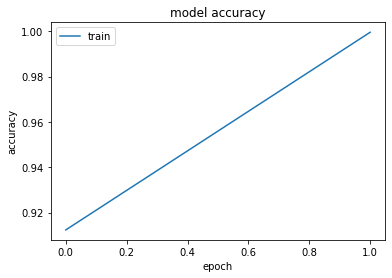

In [132]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()